<a href="https://colab.research.google.com/github/bsguarda/data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraudes_em_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraude em Cartões de Crédito

O crescimento das compras on-line e o avanço do uso dos meios digitais  trouxeram um dos problemas mais vivenciados pelas instituições financeiras como bancos e fintechs nos dias atuais. Os e-commerces são os meios no qual os criminosos atuam com maior força, no Brasil nos últimos 12 meses cerca de 59% dos consumidores já sofreram algum tipo de fraude financeira, o que corresponde a cerca de 16,7 milhões de brasileiros, somando cerca de 2,7 bilhões de reais em prejuízo.

<p align=center>
<img src="https://thecompassbr.com/wp-content/uploads/2021/07/Mao-saindo-de-um-notebook-com-cartao-na-mao-inserindo-ele-em-uma-carteira.png" width="80%"></p>


As fraudes relacionadas a cartão de crédito são bem significativas tanto para instituição quanto para o consumidor, tendo em vista que o prejuízo nos episódios de tentativas que não foram detectadas é bem considerável.
Outro viés seria os episódios de falsa detecção em alta escala, ou seja, quantas compras foram negadas e tiveram os cartões bloqueados em caráter preventivo, levando ao constrangimento e irritação por parte dos clientes.

Esses problemas trouxeram grandes oportunidades para o ramo da Data Science, trazendo investimentos na área de detecção de fraudes através da Inteligência artificial.

Hoje um grande volume de dados está disponível e podem ser processados pelos algoritmos de Machine Lerning, trazendo melhores modelos de detecção de fraudes que acarretará em uma economia de milhões de reais.   


#Importando dados

Nesse projeto iremos utilizar os dados que foram disponibilizados por algumas instituições europeias de cartões de crédito e podem ser acessados pela [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Iremos verificar nesse dataset foram coletados em 2 dias, onde no meio de 290 mil transações foram classificadas 492 fraudes, ou seja, as fraudes representam 0,17% dessa quantidade de transações, o que denota um dataset bem desbalanceado.

Essa dados foram passados por uma transformação denominada de Análise de Componentes Principais (Principal Component Analysis – PCA). O PCA permite diminuir a dimensionalidade mantendo o maior número de informações possíveis e para conseguir isso o algoritmo encontra um conjunto novo de recursos chamados de componentes.
Esses componentes são menores ou iguais em número ao das variáveis originais. Nesse caso iremos ver que os componentes achados pela transformação do PCA são as próprias colunas e $[V1, V2, V3, ...,V31]$.

<p align=center>
<img src="https://news.comschool.com.br/wp-content/uploads/2014/08/iStock-901609212-1024x678.jpg" width="50%"></p>

In [64]:
#Importando as bibliotecas 
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [65]:
#Importando o dataset e tranformando em dataframe
dataset = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

In [66]:
#Verificando o numeor de linha e de variaveis
print(f'O dataset tem\n {dataset.shape[0]} linhas\n {dataset.shape[1]} colunas')

O dataset tem
 284807 linhas
 31 colunas


In [67]:
#Verificando as 5 primiras linha do dataset
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
#Verificando a variavel class que é target a quantidade de cada classe
np.unique(dataset['Class'], return_counts=True)

(array([0, 1]), array([284315,    492]))

Iremos plotar o gráfico de barras com a variável `Class` e veremos que ela está bem desbalanceada. Temos que dos 284.807 registros e 284.315 foram classificados como não sendo fraude e 492 sendo fraude. O valor zero está atribuído ao registro que não foi classificado como fraude e o valor 1 está atribuído ao registro que foi classificado como fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


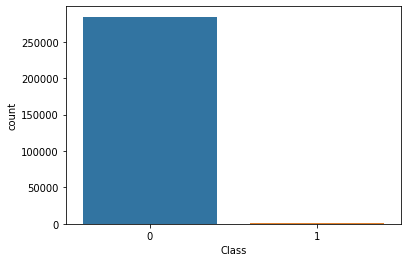

In [79]:
#Plotando um gráfico com a variavel classe
sns.countplot(dataset['Class']);

Como podemos ver no dataset existe 2 variáveis que não estão normalizadas podendo interferir durante o processamento dos dados e trazer um algoritmo ineficiente ou com resultados equivocados.

As variáveis são as seguintes:

`Time` que é o tempo em segundos entre a transação atual e a primeira transação;

`Amount` que é o valor da transação

Em resumo a normalização consiste na remodelagem de variáveis numéricas em uma escala padrão, neste caso entre 0 e 1.

Iremos padronizar esses dados mais adiante com o método `StandardScale`

###Nessa fase do projeto iremos fazer as seguintes etapas:

* Dividir os dados em matriz de treinamento e seu Target;
* Escalonar os dados em treino e teste;

In [87]:
#Dividindo os dados entre matriz de treinamento e target
X = dataset.drop('Class', axis=1) #Matriz de treinamento
y = dataset['Class'] #Target

In [88]:
#Escalonando os dados em dados de treino e dados de teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y)

In [91]:
#Verificando a divisão dos dados após escalonamento
X_treinamento.shape, y_treinamento.shape, X_teste.shape, y_teste.shape

((213605, 30), (213605,), (71202, 30), (71202,))

#Usando o Random Forest com os dados brutos (desbalanceados).

* Treinar o modelo usando o Random Forest;
* Avaliar o modelo usando o Accuracy Score;
* Avaliar o modelo com Classification Report;
* Plotar a Matriz de confusão dos valores previstos e os valores reais.



In [90]:
#Treinando o modelo usando o Random Forest
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [92]:
#Avaliando o modelo com o Accuracy Score
previsoes = modelo.predict(X_teste)
accuracy_score(previsoes, y_teste)

0.9995365298727564

In [142]:
#Avaliando com Classification Report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.92      0.81      0.86       126

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



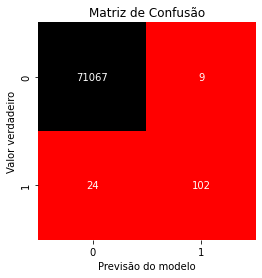

In [98]:
#Plotando a matriz de confusão
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_teste, previsoes), annot=True, square=True, cbar=False, fmt='.0f', ax=ax,  cmap='flag')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

#Usando o Regressão Logística com os dados brutos (desbalanceados).

* Treinar o modelo usando o Regressão Logística;
* Avaliar o modelo usando o Accuracy Score;
* Avaliar o modelo com Classification Report;
* Plotar a Matriz de confusão dos valores previstos e os valores reais.

In [ ]:
#Treinando o modelo usando a Regressão Logística
modelo_regressao = LogisticRegression()
modelo_regressao.fit(X_treinamento, y_treinamento)

In [100]:
#Avaliando o modelo com o Accuracy Score
previsoes_regressao = modelo_regressao.predict(X_teste)
accuracy_score(previsoes_regressao, y_teste)

0.9989887924496503

In [143]:
#Avaliando com Classification Report
print(classification_report(y_teste, previsoes_regressao))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.72      0.71      0.71       126

    accuracy                           1.00     71202
   macro avg       0.86      0.85      0.86     71202
weighted avg       1.00      1.00      1.00     71202



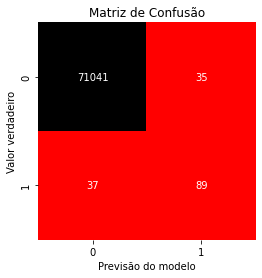

In [101]:
#Plotando a matriz de confusão
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_teste, previsoes_regressao), annot=True, square=True, cbar=False, fmt='.0f', ax=ax,  cmap='flag')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

#Usando o parâmetro de subamostragem para balanceamento - TomekLinks

Resumidamente esse modelo de balanceamento apaga alguns dos dados que estão muitos proximos fazendo um campo de classificação mais apurado.

<p align=center><img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2" width="70%"></p>


In [102]:
#Importando o pacote do TomekLinks
from imblearn.under_sampling import TomekLinks

In [103]:
#Remodelando os dados
tl = TomekLinks(sampling_strategy='majority')
X_tomek , y_tomek = tl.fit_resample(X, y)

In [104]:
#Verificando os dados após balanceamento
X_tomek.shape, y_tomek.shape

((284736, 30), (284736,))

In [105]:
#Verificando a quantidade de valores únicos antes do balanceamento
np.unique(y, return_counts=True)

(array([0, 1]), array([284315,    492]))

In [106]:
#Verificando a quantidade de valores únicos depois do balanceamento
np.unique(y_tomek, return_counts=True)

(array([0, 1]), array([284244,    492]))

In [108]:
#Escalonando os dados em dados de treino e dados de teste após o balanceamento
X_treinamento_tomek, X_teste_tomek, y_treinamento_tomek, y_teste_tomek = train_test_split(X_tomek, y_tomek)

In [109]:
#Verificando a divisão após escalonamento com os dados balanceados
X_treinamento_tomek.shape, y_treinamento_tomek.shape

((213552, 30), (213552,))

#Usando o Random Forest com os dados balanceados com o pacote TomekLinks.

* Treinar o modelo usando o Regressão Logística;
* Avaliar o modelo usando o Accuracy Score;
* Avaliar o modelo com Classification Report;
* Plotar a Matriz de confusão dos valores previstos e os valores reais.

In [110]:
#Treinando usando o Random Forest
modelo_tomek_rf = RandomForestClassifier()
modelo_tomek_rf.fit(X_treinamento_tomek, y_treinamento_tomek)

RandomForestClassifier()

In [111]:
#Avaliando o modelo com o Accuracy Score
previsoes_tomek_rf = modelo_tomek_rf.predict(X_teste_tomek)
accuracy_score(previsoes_tomek_rf, y_teste_tomek)

0.9994380759721285

In [144]:
#Avaliando com Classification Report
print(classification_report(y_teste_tomek, previsoes_tomek_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71049
           1       0.89      0.80      0.84       135

    accuracy                           1.00     71184
   macro avg       0.95      0.90      0.92     71184
weighted avg       1.00      1.00      1.00     71184



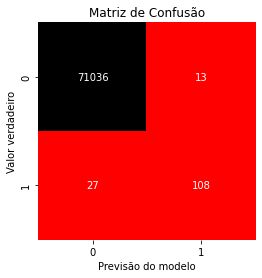

In [141]:
#Plotando a matriz de confusão
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_teste_tomek, previsoes_tomek_rf), annot=True, square=True, cbar=False, fmt='.0f', ax=ax,  cmap='flag')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

#Usando o Regressão Logística com os dados balanceados com o pacote TomekLinks.

* Treinar o modelo usando o Regressão Logística;
* Avaliar o modelo usando o Accuracy Score;
* Avaliar o modelo com Classification Report;
* Plotar a Matriz de confusão dos valores previstos e os valores reais.

In [ ]:
#Treinando o modelo com Regressão Logística
modelo_tomek_rl = LogisticRegression()
modelo_tomek_rl.fit(X_treinamento_tomek, y_treinamento_tomek)

In [116]:
#Avaliando o modelo com o Accuracy Score
previsoes_tomek_rl = modelo_tomek_rl.predict(X_teste_tomek)
accuracy_score(previsoes_tomek_rl, y_teste_tomek)

0.9990306810519218

In [145]:
#Avaliando com Classification Report
print(classification_report(y_teste_tomek, previsoes_tomek_rl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71049
           1       0.75      0.74      0.74       135

    accuracy                           1.00     71184
   macro avg       0.87      0.87      0.87     71184
weighted avg       1.00      1.00      1.00     71184



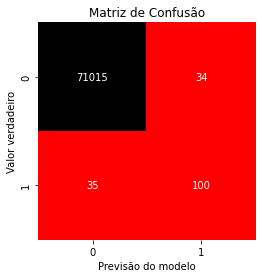

In [140]:
#Plotando a matriz de confusão
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_teste_tomek, previsoes_tomek_rl), annot=True, square=True, cbar=False, fmt='.0f', ax=ax,  cmap='flag')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

#Usando o parâmetro de sobreamostragem para balanceamento - Smote

Resumidamente esse modelo de balanceamento tem objetivo de deixar a quantidade de registros da classe minoritária próximo da classe majoritária.

<p align=center><img src="https://miro.medium.com/max/1400/1*yRumRhn89acByodBz0H7oA.png" width="70%"></p>


In [118]:
#Importando o pacote SMOTE
from imblearn.over_sampling import SMOTE

In [119]:
#Modelando os dados
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

In [120]:
#Verificando os dados após balanceamento
X_smote.shape, y_smote.shape

((568630, 30), (568630,))

In [121]:
#Verificando a quantidade de valores unicos antes do balanceamento
np.unique(y, return_counts=True)

(array([0, 1]), array([284315,    492]))

In [122]:
#Verificando a quantidade de valores unicos após o balanceamento
np.unique(y_smote, return_counts=True)

(array([0, 1]), array([284315, 284315]))

In [123]:
#Escalonando os dados em dados de treino e dados de teste após o balanceamento
X_treinamento_smote, X_teste_smote, y_treinamento_smote, y_teste_smote = train_test_split(X_smote, y_smote, test_size=0.2, stratify = y_smote)

In [124]:
#Verificando a divisão após escalonamento com os dados balanceados
X_teste_smote.shape, y_teste_smote.shape

((113726, 30), (113726,))

#Usando o Random Forest com os dados balanceados com o pacote SMOTE.

* Treinar o modelo usando o Random Forest;
* Avaliar o modelo usando o Accuracy Score;
* Avaliar o modelo com Classification Report;
* Plotar a Matriz de confusão dos valores previstos e os valores reais.

In [125]:
#Treinando o modelo usando Random Forest
modelo_smote_rf = RandomForestClassifier()
modelo_smote_rf.fit(X_treinamento_smote, y_treinamento_smote)

RandomForestClassifier()

In [126]:
#Avaliando o modelo com o Accuracy Score
previsoes_smote_rf = modelo_smote_rf.predict(X_teste_smote)
accuracy_score(previsoes_smote_rf, y_teste_smote)

0.999903276295658

In [146]:
#Avaliando com Classification Report
print(classification_report(y_teste_smote, previsoes_smote_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



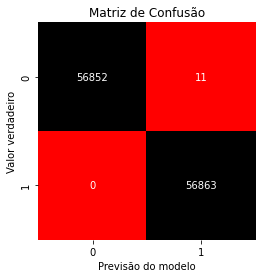

In [149]:
#Plotando a matriz de confusão
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_teste_smote, previsoes_smote_rf), annot=True, square=True, cbar=False, fmt='.0f', ax=ax,  cmap='flag')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

#Usando o Regressão Logística com os dados balanceados com o pacote SMOTE.

* Treinar o modelo usando o Regressão Logística;
* Avaliar o modelo usando o Accuracy Score;
* Avaliar o modelo com Classification Report;
* Plotar a Matriz de confusão dos valores previstos e os valores reais.

In [128]:
#Treinando o modelo usando Regressão Logística
modelo_smote_rl = LogisticRegression()
modelo_smote_rl.fit(X_treinamento_smote, y_treinamento_smote)

LogisticRegression()

In [129]:
#Avaliando o modelo com o Accuracy Score
previsoes_smote_rl = modelo_smote_rl.predict(X_teste_smote)
accuracy_score(previsoes_smote_rl, y_teste_smote)

0.9587253574380529

In [147]:
#Avaliando com Classification Report
print(classification_report(y_teste_smote, previsoes_smote_rl))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56863
           1       0.97      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



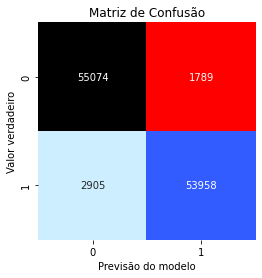

In [148]:
#Plotando a matriz de confusão
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_teste_smote, previsoes_smote_rl), annot=True, square=True, cbar=False, fmt='.0f', ax=ax,  cmap='flag')
plt.title('Matriz de Confusão')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor verdadeiro')
plt.show()

#Conclusão

* Com os dados sem uso dos pacotes de balanceamento, podemos perceber que a Acurácia tanto no modelo com Random Forest quando o modelo com Regressão Logística ficaram acima de 99%, com uma diferença do Random Forest que conseguiu avaliar melhor e ter uma precisão superior ao modelo com a Regressão Logística.

* Utilizando o pacote de balanceamento TomekLinks a Acurácia dos dois modelos ficaram acima de 99% porém diminuíram a Precisão e o Recall.

* Utilizando o pacote de balanceamento SMOTE, o modelo com Regressão Logística teve um declínio na acuraria ficando em 95% e diminuíram drasticamente a Precisão e o Recall. Já no modelo com Random Forest teve a acurácia perto de 100% e ainda conseguiu atingir 100% de Precisão, se mostrando o modelo melhor avaliado nesse projeto.
